# Arquitecturas RNN

### ¿Qué es una red neuronal recurrente?
Una red neuronal recurrente (RNN) es una clase de redes neuronales artificiales en las que las conexiones entre los nodos pueden formar ciclos, esto les permite exhibir un comportamiento dinámico a través del tiempo.

Las RNN pueden utilizar su estado interno (memoria) para procesar **secuencias de entrada de longitud variable**. Esto las hace aplicables a tareas como el reconocimiento de escritura a mano no segmentada y conectada o el reconocimiento de voz.

### ¿Por qué esta arquitectura se ajusta al problema tratado?
Se necesita un modelo que analice cada interpretación del piano (preprocesada) como una **secuencia ordenada de pulsaciones**, no como una unidad atómica. Además cada secuencia de pulsaciones puede tener una longitud arbitraria (pero acotada).

### ¿Cómo funcionan?

Lo que distingue a una Red Neuronal Recurrente de un perceptrón multicapa es que una red Neuronal Recurrente está diseñada para manejar una secuencia de entrada y otra de salida, como cuando se traduce una frase de un idioma a otro.

*Las Redes Neuronales Recurrentes actúan como una cadena. El cálculo realizado en cada paso de tiempo depende del cálculo anterior.*

### Modelos entrenados
Para la replicación de este proyecto se tomaron 3 de los 4 modelos expuestos por los autores originales:
- "Decoder Only Vanilla RNN"
- "LSTM with Local Attention"
- "LSTM with Full Attention"

### Decoder Only Vanilla RNN

Esta arquitectura toma cada pulso de entrada en el tiempo $t$ y se le concatena la nota embebida del tiempo $t-1$. El resultado de está concatenación pasa a través de una capa densa y luego entra en la red recurrente unidireccional de dos capas. A continuación se para por otra capa densa con activación softmax y de aqui ya tenemos la salida predicha.

Adicional a esto hay una conexión residual entre la salida de la concatenación y antes de las capas recurrentes.
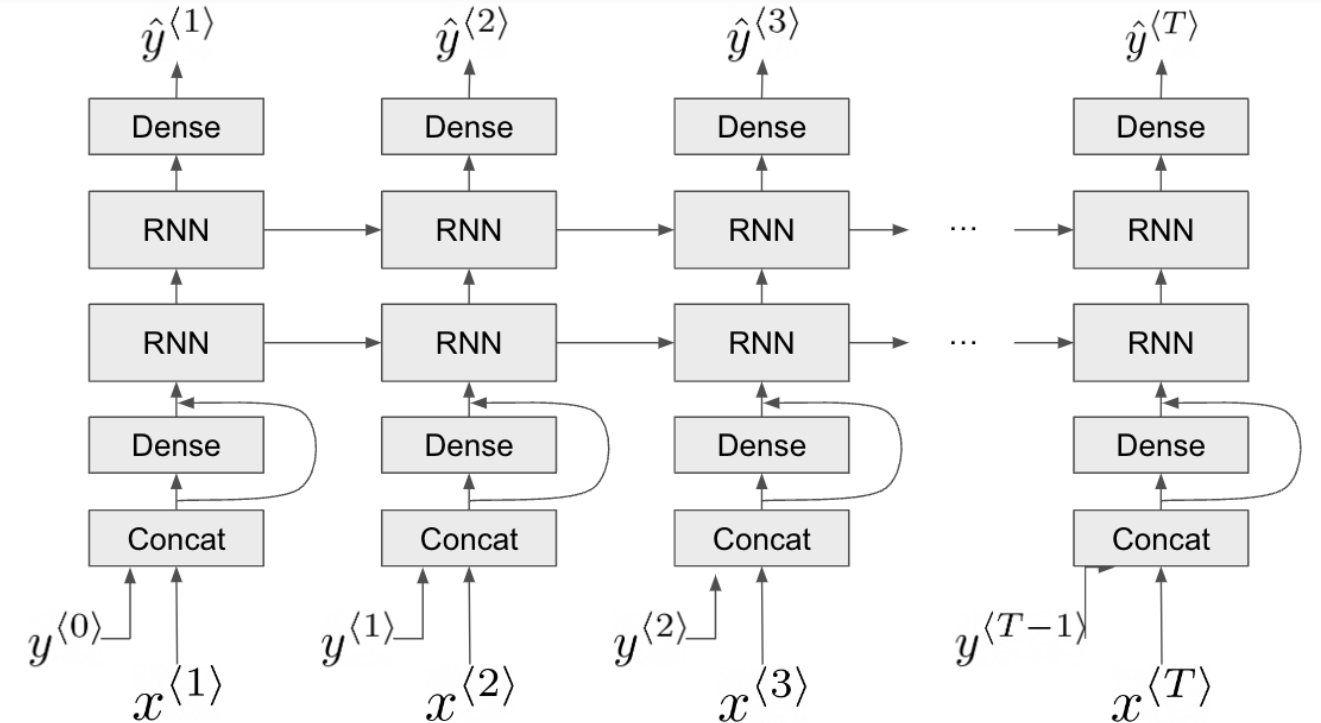
¿Que problemas posee esta arquitectura?

Esta arquitectura tiene el problema de desvanecimiento del gradiente. Además el modelo no puede acceder a la información de pulsos que vengan después.

### LSTM with Local Attention

Para intentar deshacerse del problema del gradiente se cambian las celdas RNN originales por celdas LSTM lo cual nos permite codificar memoria a largo a plazo y decidir cuanta de esta información mantener según su relevancia.  
Este modelo usa una capa LSTM bidireccional de "pre-atención" y una capa LSTM unidireccional de "post-atención"
La primera capa toma los pulsos de entrada y crea una sucesión de anotaciones. Luego se crea un vector de contexto como una suma ponderada de las anotaciones, usando el estado y vector anteriores de la LSTM "post-atención".
Finalmente el vector de contexto es concatenado con la nota embebida del tiempo anterior y esto se pasa a la LSTM "post-atención" para obtener las notas de salida.
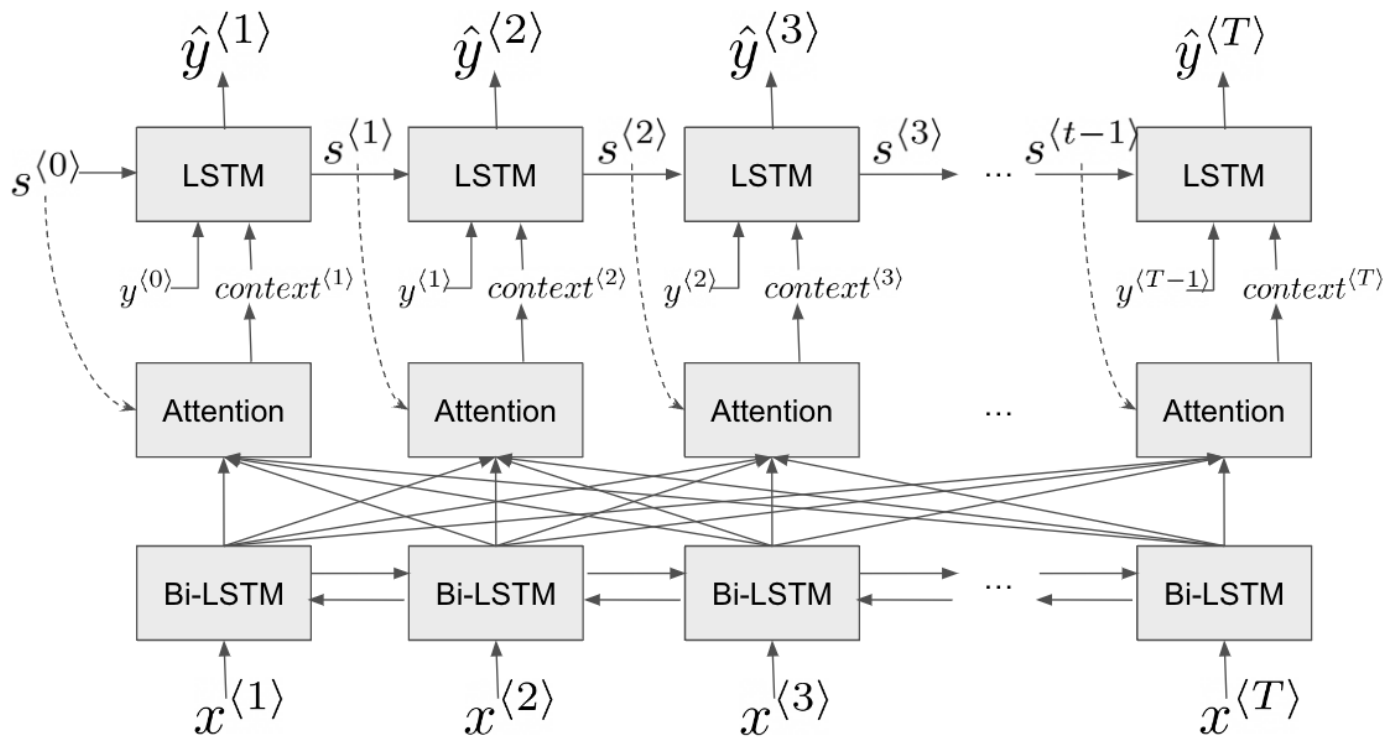
¿Que problemas posee esta arquitectura?

El costo de entrenamiento es cuadrático dada la introducción del mecanismo de atención

### LSTM with local attention
Esta arquitectura contiene una LSTM bidireccional en la primera capa y una LSTM unidireccional en la segunda. La capa bidireccional toma la sucesión de pulsos y regresa el estado final final oculto junto con una sucesión de contexto. 
La otra capa es un modelo autoregresivo donde la entrada en tiempo $t$ es una concatenación de la nota previa y el estado oculto actual.
La diferencia más significativa es que la atención en tiempo $t$ es local, y no se toma un promedio ponderado de toda la sucesión de contexto.
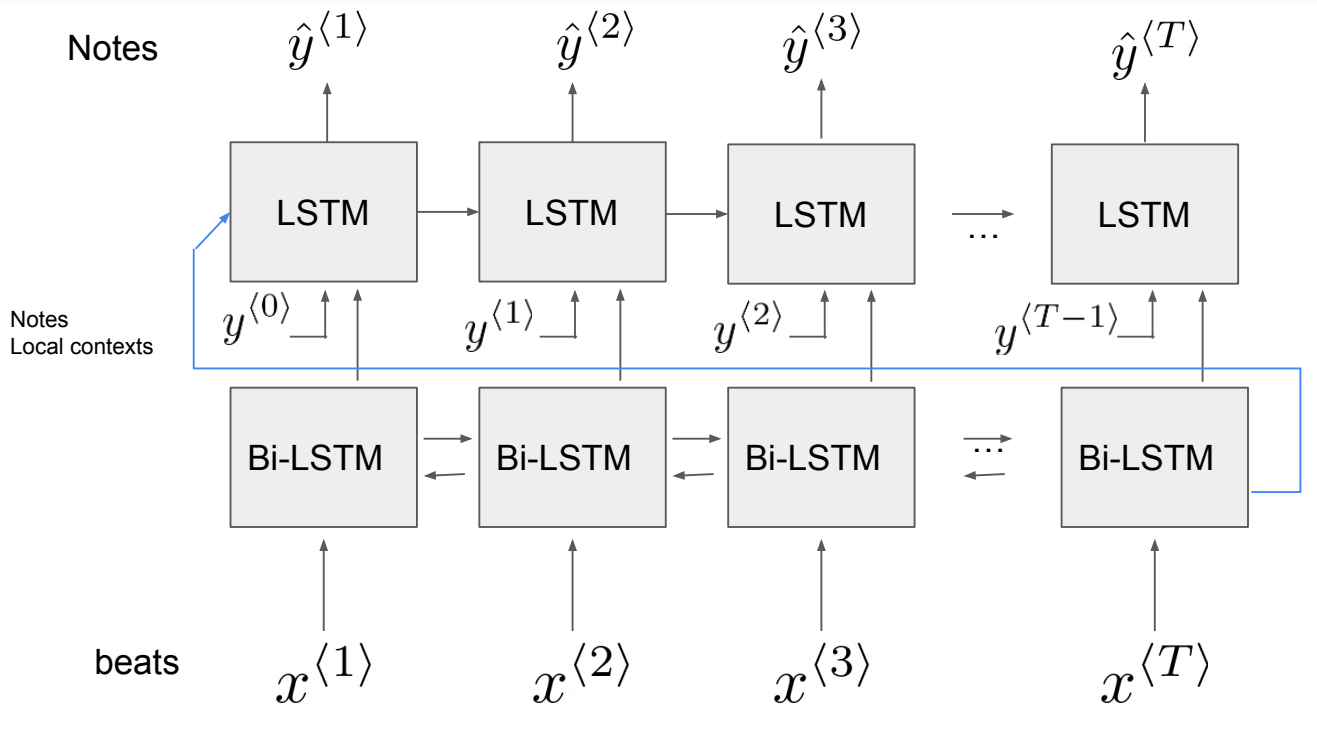
(Esta arquitectura saca provecho de la relación uno a uno que hay entre pulsos y notas)

Hablar de los parametros que se refinaron en el proceso de entrenamiento y de la metrica de desempeño

Modelo full con 400 epocas
Train Loss: 1.1288, Val Loss: 2.4319, Train Acc: 0.6881, Val Acc: 0.4123
Training data: 1148
Validation data: 127

## Playground entrenamiento

Los siguientes fragmentos de codigo configuran el entorno para poder ejecutar los comandos para entrenar o probar los modelos entrenados.
La carpeta everybody-compose main es el contenido desarrollado por  Conghao (Tom) Shen, Violet Yao, Yixin Liu en el repositorio "https://github.com/tsunrise/everybody-compose"

In [1]:
# sección interactiva
%cd everybody-compose-main

#%pip install -r requirements.txt
#%pip install --upgrade tensorboard

c:\Users\jagiraldo\Documents\proyecto\everybody-compose-main


In [ ]:
%run train.py -m lstm_attn -n 1000